In [1]:
import glob

In [2]:
from PIL import Image

In [3]:
import numpy as np

In [4]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
import matplotlib.pyplot as plt

In [6]:
from sklearn.utils import shuffle

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [10]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [11]:
no_smile = glob.glob(r"C:\Users\HARI PRASANTH K\Documents\smile stakler\dataa\non_smile\*.jpg")

In [12]:
smile = glob.glob(r"C:\Users\HARI PRASANTH K\Documents\smile stakler\dataa\smile\*.jpg")
test = glob.glob(r"C:\Users\HARI PRASANTH K\Documents\smile stakler\dataa\test\*.jpg")
sample = glob.glob(r"C:\Users\HARI PRASANTH K\Documents\smile stakler\dataa\thala\*.jpg")

In [13]:
len(smile),len(no_smile),len(test)

(600, 603, 12030)

In [14]:
img=Image.open(no_smile[50])

In [15]:
img.size

(64, 64)

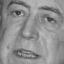

In [16]:
img=img.convert('L')
img

In [17]:
pixel_array=np.array(img)
pixel_array

array([[ 80,  92,  90, ..., 149, 147, 150],
       [ 76,  87,  88, ..., 152, 150, 151],
       [ 70,  78,  82, ..., 154, 152, 152],
       ...,
       [113, 121, 136, ..., 122, 118, 112],
       [119, 121, 130, ..., 117, 113, 106],
       [125, 121, 126, ..., 112, 107, 101]], shape=(64, 64), dtype=uint8)

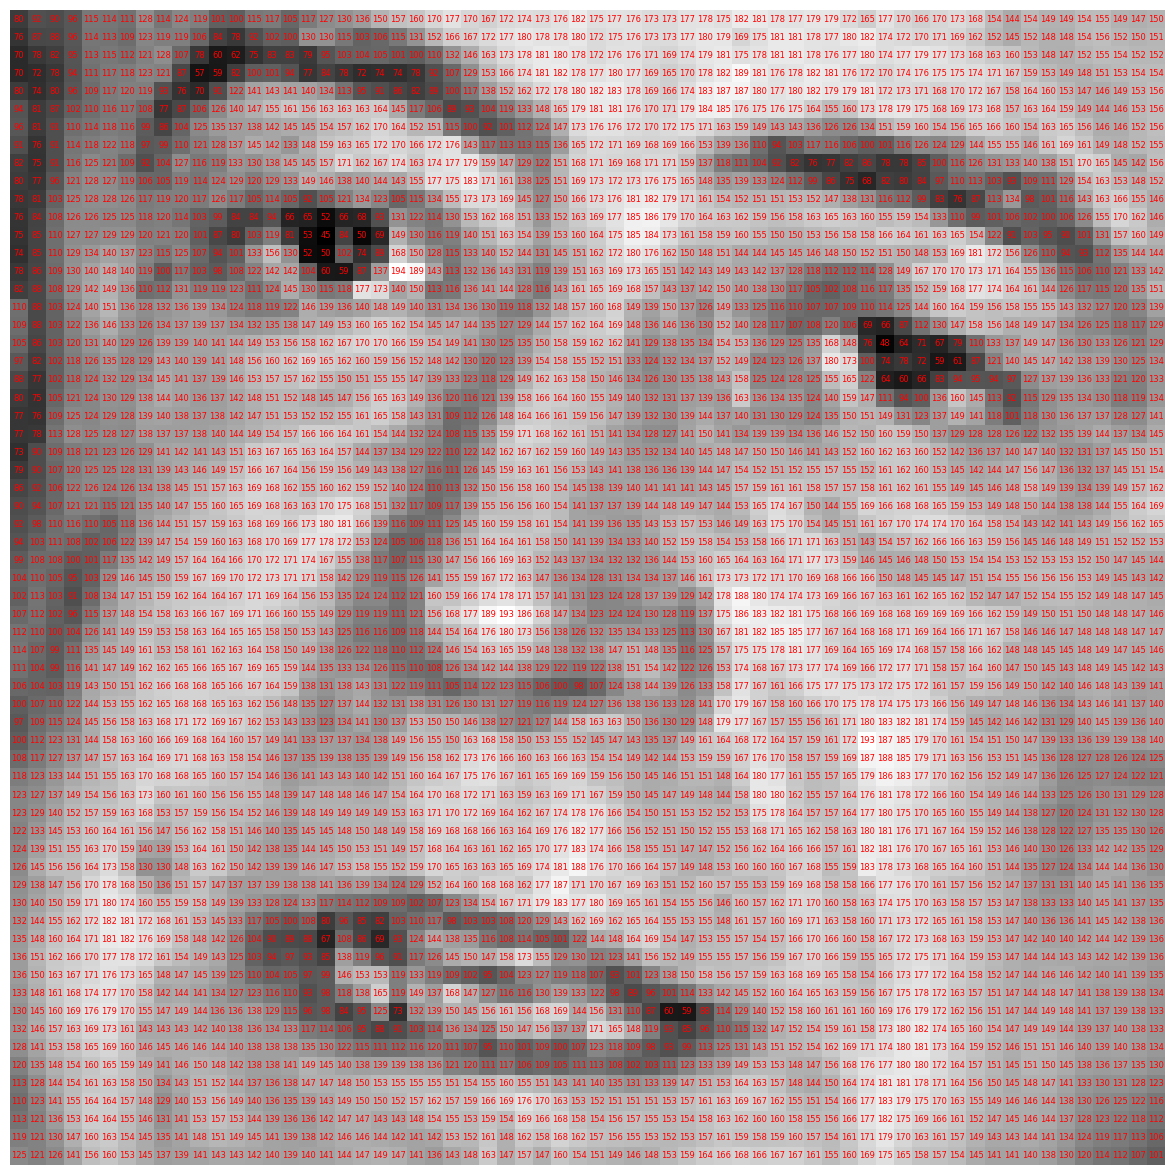

In [18]:
plt.figure(figsize=(15, 15))
plt.imshow(pixel_array, cmap="gray", interpolation="nearest")

# Show pixel values overlaid on image
for i in range(64):
    for j in range(64):
        plt.text(j, i, pixel_array[i, j], ha="center", va="center", fontsize=6, color="red")

plt.axis("off")
plt.show()

In [19]:
data=[]
labels=[]

In [20]:
# Load Non-Smiling Images
for img_name in no_smile:
    img = Image.open(img_name).convert("L")  # Convert to grayscale
    img_array = np.array(img).flatten()  # Flatten to 1D array
    data.append(img_array)
    labels.append(0)  # 0 = Non-Smiling

In [21]:
# Load Smiling Images
for img_name in smile:
    img = Image.open(img_name).convert("L")  # Convert to grayscale
    img_array = np.array(img).flatten()  # Flatten to 1D array
    data.append(img_array)
    labels.append(1)  # 1 = Smiling

In [22]:
X = np.array(data)

In [23]:
y=np.array(labels)

In [24]:
# 📌 Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [27]:
X_train_scaled[0]

array([-0.02538072,  0.19720776,  0.40115046, ..., -1.43250336,
       -1.41042084, -1.37429772], shape=(4096,))

In [28]:
# 📌 Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [29]:
# 📌 Make Predictions
y_pred = model.predict(X_test_scaled)

In [30]:
y_pred_train = model.predict(X_train_scaled)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1])

In [31]:
# Predict Probablity
model.predict_proba(X_test_scaled)

array([[4.72060371e-06, 9.99995279e-01],
       [2.48073572e-01, 7.51926428e-01],
       [9.90126214e-01, 9.87378612e-03],
       [2.16298091e-11, 1.00000000e+00],
       [1.00000000e+00, 4.81260372e-12],
       [9.95139836e-01, 4.86016409e-03],
       [2.40434173e-07, 9.99999760e-01],
       [9.99996392e-01, 3.60849288e-06],
       [3.24469696e-09, 9.99999997e-01],
       [1.55912385e-04, 9.99844088e-01],
       [6.16235485e-03, 9.93837645e-01],
       [2.52692174e-08, 9.99999975e-01],
       [9.99999935e-01, 6.50809136e-08],
       [9.91609270e-01, 8.39072987e-03],
       [1.00000000e+00, 4.31811179e-10],
       [9.99999947e-01, 5.26841172e-08],
       [2.86972733e-02, 9.71302727e-01],
       [9.99924908e-01, 7.50923575e-05],
       [1.25304224e-08, 9.99999987e-01],
       [9.99995244e-01, 4.75591760e-06],
       [2.26290275e-09, 9.99999998e-01],
       [1.11325419e-02, 9.88867458e-01],
       [9.96691628e-01, 3.30837191e-03],
       [2.73834265e-08, 9.99999973e-01],
       [9.996634

In [32]:
# 📌 Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.8963
Confusion Matrix:
 [[115  11]
 [ 14 101]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       126
           1       0.90      0.88      0.89       115

    accuracy                           0.90       241
   macro avg       0.90      0.90      0.90       241
weighted avg       0.90      0.90      0.90       241



In [33]:
# Define parameter grid
param_grid = {
    'penalty' : ['l1','l2', 'elasticnet'],
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga', 'newton-cg']
}

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
log_reg = LogisticRegression()

In [36]:
cv = StratifiedKFold()

In [37]:
# Perform grid search
grid_search = GridSearchCV(log_reg, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

c:\Users\HARI PRASANTH K\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HARI PRASANTH K\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HARI PRASANTH K\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwarg

,estimator,LogisticRegression()
,param_grid,"{'C': [0.01, 0.1, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['liblinear', 'lbfgs', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [38]:
grid_search.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

In [39]:
grid_search.best_score_

np.float64(0.8814550949913645)

In [40]:
tuned_model = grid_search.best_estimator_ 

In [41]:
y_pred = tuned_model.predict(X_test_scaled)


In [42]:
# 📌 Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.9004
Confusion Matrix:
 [[116  10]
 [ 14 101]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91       126
           1       0.91      0.88      0.89       115

    accuracy                           0.90       241
   macro avg       0.90      0.90      0.90       241
weighted avg       0.90      0.90      0.90       241



In [43]:
import pickle

In [ ]:
pickle.dump(tuned_model, open('smile_please.pkl', 'wb'))

In [45]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))